In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [3]:
#| label: wind-raw-dataset-preview

wind_df = pd.read_csv('../data/wind.csv')
solar_df = pd.read_csv('../data/solar.csv')

wind_df.head(10)

,id,lat,long,wind_speed,farm_type,capacity,capacity_factor,power_generation,estimated_cost
0,0,23.510410,-117.147260,6.07,offshore,16,0.169,23687.04,20800000
1,1,24.007446,-93.946777,7.43,offshore,16,0.302,42328.32,20800000
2,2,25.069138,-97.482483,8.19,offshore,16,0.375,52560.00,20800000
3,3,25.069443,-97.463135,8.19,offshore,16,0.375,52560.00,20800000
4,4,25.069763,-97.443756,8.19,offshore,16,0.376,52700.16,20800000
5,5,25.070091,-97.424377,8.19,offshore,16,0.375,52560.00,20800000
6,6,25.070404,-97.404999,8.19,offshore,16,0.375,52560.00,20800000
7,7,25.086678,-97.482849,8.18,offshore,16,0.375,52560.00,20800000
8,8,25.087006,-97.463470,8.19,offshore,16,0.376,52700.16,20800000
9,9,25.087318,-97.444092,8.19,offshore,16,0.376,52700.16,20800000


In [6]:
#| label: solar-raw-dataset-preview

solar_df.head(10)

,id,lat,long,irradiance,farm_type,capacity,capacity_factor,power_generation,estimated_cost
0,0,25.896492,-97.460358,5.634079,large_community,5.000,0.235,1.028219e+04,13300000
1,1,26.032654,-97.738098,5.616413,small_utility,5.000,0.234,1.024995e+04,13300000
2,2,26.059063,-97.208252,5.746738,small_community,0.150,0.239,3.146339e+02,399000
3,3,26.078449,-98.073364,5.742196,small_utility,5.000,0.239,1.047951e+04,13300000
4,4,26.143227,-98.311340,5.817187,small_utility,5.000,0.242,1.061637e+04,13300000
5,5,26.149040,-98.075409,5.701752,large_community,5.000,0.238,1.040570e+04,13300000
6,6,26.180355,-97.367737,5.720004,medium_utility,500.000,0.238,1.043901e+06,1330000000
7,7,26.254963,-98.078491,5.730308,small_residential,0.005,0.239,1.045781e+01,13300
8,8,26.272160,-98.098694,5.734213,large_utility,2000.000,0.239,4.185975e+06,5320000000
9,9,26.272625,-98.078979,5.755140,small_community,0.150,0.240,3.150939e+02,399000


In [4]:
wind_X = wind_df.loc[:, wind_df.columns[1:3]]
solar_X = solar_df.loc[:, solar_df.columns[1:3]]

In [8]:
K_clusters = range(1,100)

wind_kmeans = [KMeans(n_clusters=i, n_init='auto') for i in K_clusters]
wind_Y_axis = wind_X[['lat']]
wind_X_axis = wind_X[['long']]

solar_kmeans = [KMeans(n_clusters=i, n_init='auto') for i in K_clusters]
solar_Y_axis = solar_X[['lat']]
solar_X_axis = solar_X[['long']]

In [9]:
wind_score = [wind_kmeans[i].fit(wind_Y_axis).score(wind_Y_axis) for i in range(len(wind_kmeans))]

In [10]:
solar_score = [solar_kmeans[i].fit(solar_Y_axis).score(solar_Y_axis) for i in range(len(solar_kmeans))]

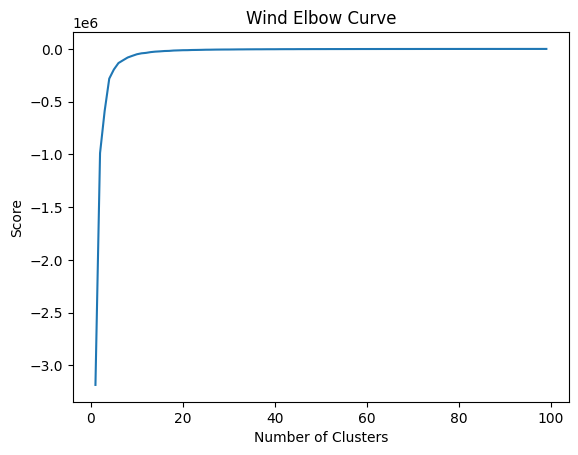

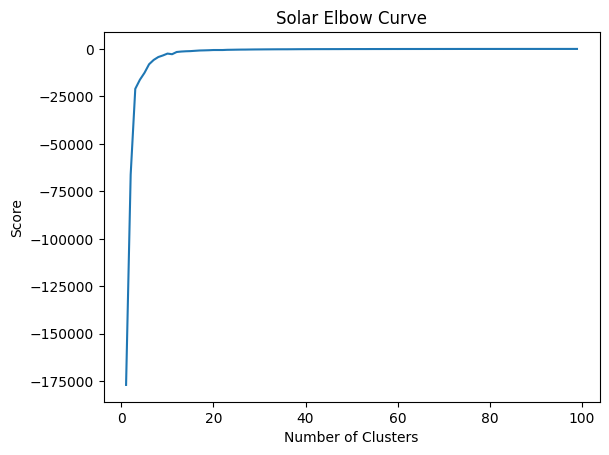

In [12]:
#| label: fig-optimal-clusters
#| layout-ncol: 2

plt.plot(K_clusters, wind_score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Wind Elbow Curve')
plt.show()

plt.plot(K_clusters, solar_score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Solar Elbow Curve')
plt.show()

In [5]:
#| label: clustered-model

wind_n_clusters = 20
wind_kmeans = KMeans(wind_n_clusters, init='k-means++', n_init='auto')
wind_kmeans.fit(wind_X[wind_X.columns[0:2]])

solar_n_clusters = 20
solar_kmeans = KMeans(solar_n_clusters, init='k-means++', n_init='auto')
solar_kmeans.fit(solar_X[solar_X.columns[0:2]])

KMeans(n_clusters=20)

In [6]:
#| label: wind-clustered-data-preview

wind_X['cluster_label'] = wind_kmeans.fit_predict(wind_X[wind_X.columns[0:2]])
wind_X.head(10)

,lat,long,cluster_label
0,23.510410,-117.147260,16
1,24.007446,-93.946777,8
2,25.069138,-97.482483,9
3,25.069443,-97.463135,9
4,25.069763,-97.443756,9
5,25.070091,-97.424377,9
6,25.070404,-97.404999,9
7,25.086678,-97.482849,9
8,25.087006,-97.463470,9
9,25.087318,-97.444092,9


In [7]:
#| label: solar-clustered-data-preview

solar_X['cluster_label'] = solar_kmeans.fit_predict(solar_X[solar_X.columns[0:2]])
solar_X.head(10)

,lat,long,cluster_label
0,25.896492,-97.460358,19
1,26.032654,-97.738098,19
2,26.059063,-97.208252,19
3,26.078449,-98.073364,19
4,26.143227,-98.311340,19
5,26.149040,-98.075409,19
6,26.180355,-97.367737,19
7,26.254963,-98.078491,19
8,26.272160,-98.098694,19
9,26.272625,-98.078979,19


In [8]:
wind_centers = wind_kmeans.cluster_centers_
wind_labels = wind_kmeans.predict(wind_X[wind_X.columns[0:2]])

solar_centers = solar_kmeans.cluster_centers_
solar_labels = solar_kmeans.predict(solar_X[solar_X.columns[0:2]])

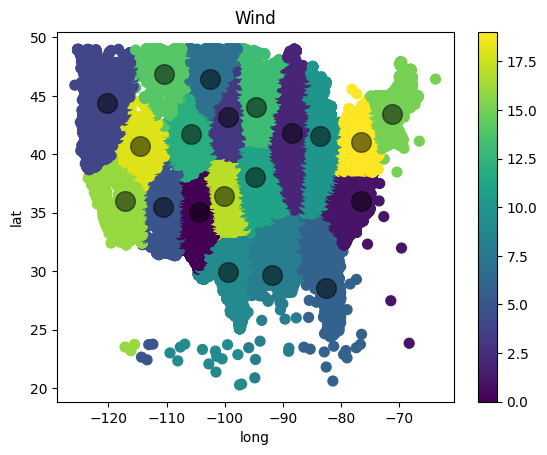

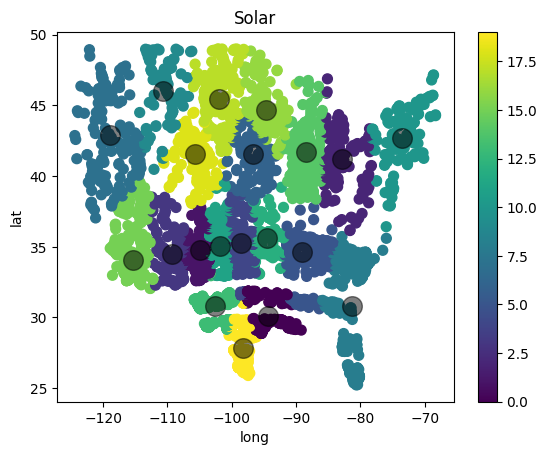

In [9]:
#| label: fig-clustered-data
#| layout-ncol: 2

wind_X.plot.scatter(x = 'long', y = 'lat', c=wind_labels, s=50, cmap='viridis')
plt.scatter(wind_centers[:, 1], wind_centers[:, 0], c='black', s=200, alpha=0.5)
plt.title("Wind")
plt.show()

solar_X.plot.scatter(x = 'long', y = 'lat', c=solar_labels, s=50, cmap='viridis')
plt.scatter(solar_centers[:, 1], solar_centers[:, 0], c='black', s=200, alpha=0.5)
plt.title("Solar")
plt.show()

In [22]:
wind_df.drop('lat', axis=1, inplace=True)
solar_df.drop('lat', axis=1, inplace=True)

wind_df.long = wind_X.cluster_label
solar_df.long = solar_X.cluster_label

wind_df.rename(columns={"long":"cluster_id"}, inplace=True)
solar_df.rename(columns={"long":"cluster_id"}, inplace=True)

wind_df.to_csv('../data/wind_clustered.csv', index=None, header=True)
solar_df.to_csv('../data/solar_clustered.csv', index=None, header=True)